**1. Basics of Python for Data Analysis**

Why learn Python for data analysis?
	- Open source
	- Good community
	- Easy to learn
	- Common language for data science + production of web-based analytic products
	- BAD: interpreted language rather than compiled language (might take up more CPU time)

Python 2.7 vs 3.4
	- 2.7: community support, third-party libraries
	- 3.4: cleaner + faster, it is the future, have some backward compatibility

How to install python?
	1. Download python from project site
	2. Install a package w/ pre-installed libraries (Anaconda)

Choose development environment
	1. Terminal/shell based
	2. IDLE (default environment)
iPython notebook, Jupyter Notebook (similar to R markdown)

**2. Python libraries and Data Structures**

**Lists**: 
- one of most versatile data structures in Python
- can be defined by writing a list of comma separated values in brackets.
- can contain items of diff types, but usually all items have same type
- mutable and individual elements of list can be changed

In [1]:
squares_list = [0,1,4,9,16,25]
squares_list

[0, 1, 4, 9, 16, 25]

In [2]:
squares_list[2:4]

[4, 9]

In [3]:
# negative index assess list from end 
squares_list[-2] # this should return 2nd last element in list

# common methods applicable to lists include: append(), extend(), insert(), remove(), pop(), 
# count(), sort(), reverse()

16

**Strings, Tuples, Dictionary**

**Python Iteration and Conditional Constructs**
Like most languages, python has **for-loops** which are used mainly for iteration:
- for i in [Python Iterable]:
    - expression(i)
Here, python iterable can be a list, tuple, or other advanced data structures 

In [4]:
def factorial(N):
    fact = 1
    for i in range(1,N+1):
        fact *= i
        print(fact)

In [5]:
factorial(4)

1
2
6
24


**Conditional statements**: used to execute code fragments based on a condition, most commonly used construct is if-else

In [6]:
def evenodd(N):
    if N%2 == 0:
        print('even')
    else:
        print('odd')

In [7]:
evenodd(49)

odd


In [8]:
# define alias m to library math, can now use funcs from math library such as m.factorial()
import math as m

# import entire name space in math (can use factorial() w/o referring to math)
from math import *

**Python Libaries**

- NumPy (numerical python)
- SciPy (scientific python)
- Matplotlib
- Pandas
- Scikit Learn
- Statsmodels
- Seaborn
- Bokeh
- Blaze
- Scrapy
- SymPy
- Requests

additional libraries:
- os
- networkx and igraph
- regular expressions
- BeautifulSoup

Now, we can make a predictive model. 3 key phases:
1. Data Exploration: finding out more about data we have
2. Data Munging: cleaning data and playing with it to make it better suit statistical modeling
3. Predictive Modeling: running actual algorithms

**3. Exploratory Analysis in Python using Pandas**

Pandas: 
- for structured data operations + manipulations
- for data munging and prep
- added recently to python

2 key data structures in pandas: Series and Dataframes

**intro to Series and Dataframes**

series: 
- 1 dimensional labelled/indexed array
- can access individual elements of series thru these labels

dataframe:
- similar to excel workbook
- column names refer to columns and rows that can be accessed w/ row numbers
- essential DIFFERENCE is that column names and row numbers are known as column + row index (in case of data frames)

series + dataframe form core data model for Pandas in Python, data sets are first read into these dataframes and then various operations (group by, aggregation, etc.) can be applied easily to columns

**Practice data set - Loan Prediction Problem**



**begin w/ exploration**

In [9]:
# start iPython interface in InLine PyLab mode by typing this
%pylab inline 
# this opens ipython notebook in pylab environment, already has useful libraries imported, can also 
# plot data inline, which makes this a really good environment for interactive data analysis 

Populating the interactive namespace from numpy and matplotlib


C:\Users\liuco\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['modf', 'floor', 'cosh', 'tanh', 'isclose', 'sin', 'hypot', 'fabs', 'log', 'sinh', 'e', 'log1p', 'exp', 'nan', 'frexp', 'fmod', 'log10', 'gamma', 'ceil', 'tan', 'expm1', 'radians', 'pi', 'isfinite', 'sqrt', 'cos', 'log2', 'gcd', 'isnan', 'inf', 'trunc', 'remainder', 'degrees', 'ldexp', 'isinf', 'copysign']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

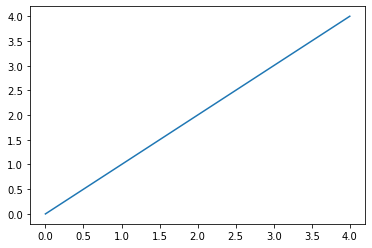

In [11]:
plot(arange(5))

In [12]:
# dataset is in:
# C:/Users/liuco/Downloads/train.csv

# read dataset in dataframe using pandas
df = pd.read_csv("C:/Users/liuco/Downloads/train.csv")

**QUICK DATA EXPLORATION**

In [13]:
# look at top few ros using function head()
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [14]:
# summary of numerical fields using describe() function
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

1. LoanAmount has (614 – 592) 22 missing values.
2. Loan_Amount_Term has (614 – 600) 14 missing values.
3. Credit_History has (614 – 564) 50 missing values.
4. We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
5. The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

note: can get idea of possible skew by comparing mean to median (50$ value)

for non-numerical values (Property_Area, Credit_History, etc.), can look at **frequency distn** to understand if the make sense or not

In [15]:
# frequency table
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

similarly, can look at unique values of port of credit history.

note: dfname['column_name'] is a basic indexing technique to access particular column of dataframe. it can be list of column names as well.

**DISTRIBUTION ANALYSIS**

look at **histograms** as a starting point

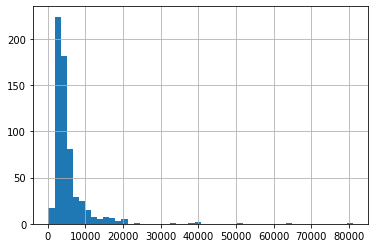

In [16]:
# plot histogram of ApplicantIncome 
df['ApplicantIncome'].hist(bins=50)

Here, we can see that there are few extreme values. This is why only 50 bins are required to depict distribution clearly.

Look at **box plots** to understand distributions:

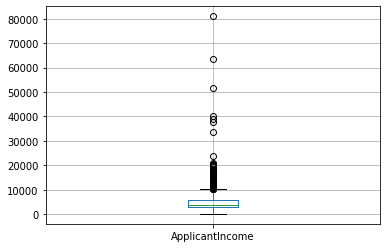

In [17]:
# box plot plot
df.boxplot(column = 'ApplicantIncome')

This confirms pressence of a lot of outliers/extreme values, could be attributed to:
- income disparity in society (maybe b/c looking at ppl w/ diff education levels)

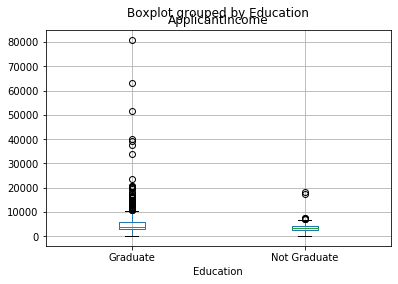

In [18]:
# segregate ppl by Education
df.boxplot(column = 'ApplicantIncome', by = 'Education')

we can see that there is no substantial difference b/w **mean income** of grads + non-grads, but there are a higher number of grads w/ very high incomes that appear to be outliers

lets explore **histogram + box plot** of LoanAmount

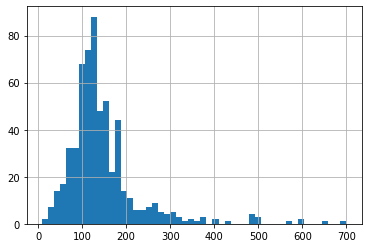

In [19]:
# histogram of LoanAmount
df['LoanAmount'].hist(bins = 50)

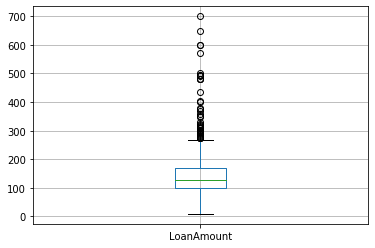

In [20]:
df.boxplot(column = 'LoanAmount')

Again, there are extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of **data munging**. LoanAmount has missing values + extreme values. ApplicantIncome has a few extreme values, needs deeper understanding.

**CATEGORICAL VARIABLE ANALYSIS**

we will use excel style **pivot table + cross-tabulation**.

e.g. look at chances of getting a loan based on creidt history
pivottable fields: rows = Credit_History, Values = Average of Loan_...

In [21]:
# keep count of credit history (1 for yes, 0 for no)
temp1 = df['Credit_History'].value_counts(ascending = True)
# make pivot table of credit history vs. loan status for 1 (yes) and 0 (no), 
    # find mean of each category by map() function
temp2 = df.pivot_table(values = 'Loan_Status', index = ['Credit_History'], aggfunc = lambda x: x.map
                      ({'Y':1, 'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan fir each credit history class:')
print(temp2)

# note we are able to obtain a similar pivot_table to the excel format.

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan fir each credit history class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan vs Credit_History')

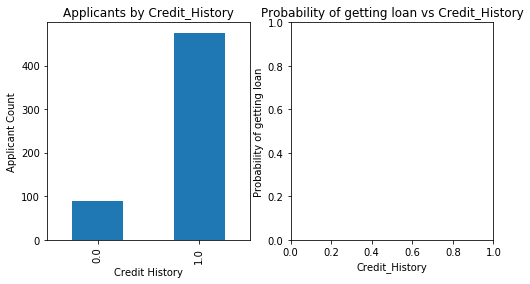

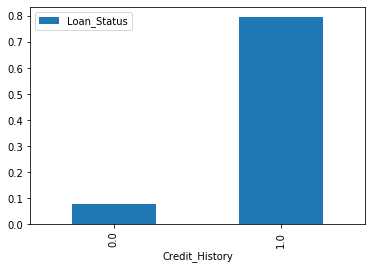

In [22]:
# we can plot bar chart using matplotlib library with following code
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Applicant Count')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan vs Credit_History')


the above plots show chances of getting loan is 8x more if applicant has valid credit history, can plot similar graphs w/ Married, Self-Employed, Property_Area, etc.

alternatively, these 2 plots can be visualized by combining them in a **stacked chart**:

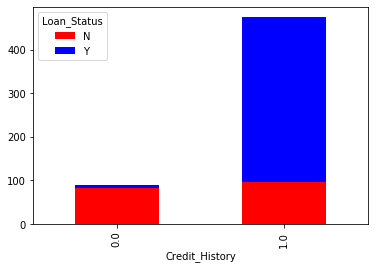

In [23]:
# stacked chart
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind = 'bar', stacked = True, color = ['red', 'blue'], grid = False)


we have just created 2 basic classification algorithms here, one based on credit history, while other on 2 categorical variables (gender + credit history)

**4. DATA MUNGING IN PYTHON: USING PANDAS**

**Data munging - recap**
while exploring our data, found a few problems which need to be solved before data is ready to be modelled, what we are going to do is referred to as "data munging", here are the problems:

**1. missing values in some variables, should estimate those values wisely depending on amount of missing values + expected importance of variables**

- MAR
- MCAR
- MNAR (not ok to delete b/c can produce bias

deletion: 

1. listwise - removes all data for observation that has one or more missing values (if missing data is 
           limited to small # of observations)
2. pairwise - analyses all cases in which variable of interest are present and thus maximizes
            all data available by an analysis bias (assumes MCAR)
3. dropping variables - drop variables if data is missing for more than 60% of observations 
                    (imputation preferred over dropping variables)
                    
Time-series specific methods:

1. last observation carried forward (LOCF) - bad for trend
2. next observation carried backward (NOCB) - bad for trend
3. linear interpolation - works well for time series w/ trend but not for seasonal data
4. seasonal adjustment + linear interpolation - works well for data w/ both trend + seasonality

Mean, median and mode:

linear regression:

multiple imputation:

imputation of categorical variables:

KNN (nearest neighbors):

**2. looking at distns, see that ApplicantIncome and LoanAmount seemed to contain extreme values at either end, though they might make sense intuitively, should be treated appropriately**

- in addition to the problems w/ numerical fields, should look at non-numerical fields (i.e. Gender, Property_Area, Married, Education, Dependents) to see if they contain any useful info

**CHECK MISSING VALUES IN DATASET**

look at **missing values** in all variables b/c most models don't work w/ missing data. most models do better w/ imputation anyways

In [24]:
# this command tells us number of missing values in each column (if isnull() returns 1, value is null)
df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see, the missing values are not high in number, but many variables have missing observations and each of those should be estimated and added in the data **(imputation)**

note: missing data cannot always be NaNs, e.g. if Loan_Amount_Term is 0, does it make sense or would you consider that missing?

**HOW TO FILL MISSING VALUES IN LoanAmount?**

many ways of filling missing values of loan amount - the simplest way = **replacement by mean**

In [25]:
# replacement by mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

Other way to impute data is to build a **supervised learning model** to predict loan amount on basis of other variables, and then use age along w/ other variables to predict survival

To highlight data munging, we will take an approach which is somewhere in between.
    => Key hypothesis: we can use the fact that a person is educated or self-employed and combine them to get a good estimate of loan amount 
    
First: need to look at boxplot to see if trend exists

In [26]:
# see if Self_Employed has missing values, look at frequency table
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Because ~86% of values are "No", we can impute missing values as "No" as there is a high probability of success

In [27]:
# impute missing values as "No"
df['Self_Employed'].fillna('No', inplace = True)


Now, we can create a **Pivot table** which provides us median values for all groups of unique values of Self_Employed + Education features. Then, we define a function which returns values of these cells and apply it to fill the missing values of loan amount

In [28]:
# pivot table
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values (only works if didn't already fill missing values w/ mean)
#df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True) 


**HOW TO TREAT FOR EXTREME VALUES IN DISTN OF LoanAmount AND ApplicantIncome**

Let's analyze LoanAmount first. Since extreme values are practically possible (some people might apply for high value loans due to specific needs), dont treat them as outliers and instead try using **log transformation** to nullify effect

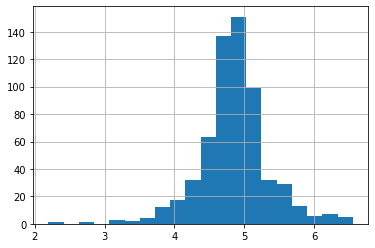

In [29]:
# log transform
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# histogram of log transform
df['LoanAmount_log'].hist(bins = 20)

Now distribution looks much closer to **NORMAL** and effects of extreme values have been significantly subsided.

Next, for ApplicantIncome one intuition can be some applicants have lower income but strong support co-applicants. AKA might be good idea to combine both incomes as total income and take log transformation of same

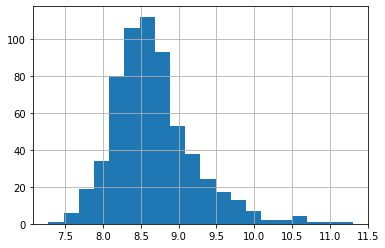

In [30]:
# combine applicant + co-applicant to total
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

# histogram of log transform of TotalIncome
df['TotalIncome_log'].hist(bins = 20)

We can clearly see that the distn is much better than before (closer to **Normal**)

Next, we can impute missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History.

Also: think about how additional info can be drawn from data such as how well the applicant is suited to pay back his loan (LoanAmount/TotalIncome)

**5. BUILDING A PREDICTIVE MODEL IN PYTHON**
after we have made data useful for modeling, look at python code to create predictive model based on our data set. **skicit-learn (sklearn)** is most commonly used library in Python for this purpose.

sklearn requires all inputs to be numeric, so need to convert all categorical variables into numeric by encoding the categories. before this, we will fill all missing values in dataset

In [31]:
# fill missing values in dataset
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Next, we will import required modules. Then, we will define a **generic classification function** which takes a model as input and determines the Accuracy and Cross-Validation scores.

In [87]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

 #Perform k-fold cross-validation with 5 folds
  kf = KFold(5)
  error = []
  for train, test in kf.split(predictions):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

**LOGISTIC REGRESSION**

We will make our 1st **logistic regression model**. One way would be to take all variables in model, but must result in **overfitting**.

We can make some intuitive hypothesis to start. The chance of getting a loan will be higher for:
1. applicants w/ credit history (observed this in exploration)
2. applicants w/ higher applicant + co-applicant incomes (total income)
3. applicants w/ higher education level
4. properties in urban areas w/ high growth perspectives

So, let's make our first model w/ Credit_History

In [88]:
# LOGISTIC REGRESSION

outcome_var = 'Loan_Status'
model1 = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model1, df,predictor_var,outcome_var)


Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [89]:
# can try different combination of variables:

predictor_var = ['Credit_History', 'Education', 'Married', 'Self_Employed', 'Property_Area']
classification_model(model1, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Generally, we expect accuracy to increase on adding variables, but this is not always the case. The accuracy and cross-validation scores are not getting impacted by less important variables. Credit_History is dominating the model. Now, we have two options:

1. Feature Engineering: derive new info and try to predict those
2. Better modeling techniques

**DECISION TREE**

**Decision Trees** are another method for making predictive models. Known to provide higher accuracy than logistic regression

In [94]:
# DECISION TREE (CATEGORICAL VARIABLES)
model3 = DecisionTreeClassifier()
predictor_var = ['Credit_History', 'Gender', 'Married', 'Education']
classification_model(model3, df, predictor_var, outcome_var)

# accuracy: 81.930% CV-score: 76.656%

Accuracy : 80.945%
Cross-Validation Score : 80.946%


We can see that the model based on categorical vriables is unable to have an imapct b/c Credit History is too dominant. Let's try a few numerical variables:

In [105]:
# DECISION TREE (NUMERICAL VARIABLES)

predictor_var = ['Credit_History', 'Loan_Amount_Term', 'LoanAmount_log']
classification_model(model, df, predictor_var, outcome_var)

# accuracy: 92.345%, CV-score: 71.009%

Accuracy : 89.414%
Cross-Validation Score : 68.722%


Here we observed that accuracy went up on adding variables, and CV error went down. This is the result of **model over-fitting data**, let's try an even more sophisticiated algorithm

**RANDOM FOREST**

Random forest is another algo for solving classification problems

Advantage of random forest is that we can make it work w/ all features and returns a feature importance mtx which can be used to select features

In [107]:
# RANDOM FOREST

model = RandomForestClassifier(n_estimators = 100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log', 'TotalIncome_log']
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.178%


Here, we see that accuracy is **100% for training set**. This is the case of **OVERFITTING** and can be resolved in 2 ways:

1. reduce # of predictors
2. tune model params

Let's try both of these, but first let's see if we can derive a feature importance mtx which we'll take most important features:

In [110]:
# create feature importance series
featimp = pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print(featimp)

Credit_History      0.268442
TotalIncome_log     0.266359
LoanAmount_log      0.226326
Dependents          0.051828
Property_Area       0.050113
Loan_Amount_Term    0.045152
Married             0.026148
Education           0.022723
Gender              0.021652
Self_Employed       0.021256
dtype: float64


Let's use the **top 5 variables** for creating model. Also, lets modify the params of RF model a bit

In [113]:
model = RandomForestClassifier(n_estimators = 25, min_samples_split = 25, max_depth = 7, max_features = 1)
predictor_var = ['TotalIncome_log', 'LoanAmount_log', 'Credit_History', 'Dependents', 'Property_Area']
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 82.573%
Cross-Validation Score : 81.112%


Note that although accuracy reduced, CV score is improving (this means model is generalizing well). Remember that **RF models are not exactly repeatable**. Different runs result in slight variations b/c of **randomization**, but output should remain similar (ballpark)

Also note that some basic param tuning on RF resulted in better CV accuracy only slightly better than original logistic regression model:

1. using a more sophisticated model doesn't guarantee better results
2. avoid using complex modeling techniques as black box test w/o understanding underlying concepts, doing so would increase tendency of overfitting and making models less interpretable
3. feature engineering is key to sucess